In [1]:
import json
import pandas as pd
import numpy as np
rmses = json.load(open('./rmse.json'))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from matplotlib.colors import ListedColormap

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.8
plt.rcParams['grid.linestyle'] = 'dotted'
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['figure.figsize'] = (4.845, 3.135)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['mathtext.default']='regular'

colors = ListedColormap(sns.color_palette('deep')).colors
arousal_color = colors[0]
valence_color = colors[1]
error_color = 'black'
# bg_color = ListedColormap(sns.color_palette('Greys', 4)).colors[0]
# signal_color = ListedColormap(sns.color_palette('Greens', 4)).colors[3]

In [3]:
arousal_color = ListedColormap(sns.color_palette('Greys', 4)).colors[1]
valence_color = ListedColormap(sns.color_palette('Greys', 4)).colors[2]
error_color = ListedColormap(sns.color_palette('Greys', 4)).colors[3]

In [4]:
rmses.keys()

dict_keys(['folds_level', 'scenarios_level', 'files_level'])

## scenarios level

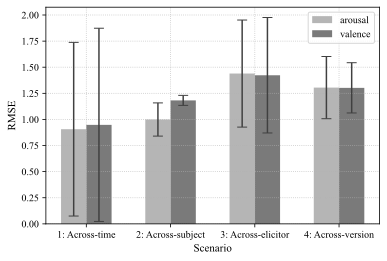

In [5]:
scenarios_level_arousal_rmses = []
scenarios_level_arousal_stds = []
scenarios_level_valence_rmses = []
scenarios_level_valence_stds = []

scenarios = np.array([1, 2, 3, 4])

for s in scenarios:
    scenarios_level_arousal_rmses.append(rmses['scenarios_level'][f'scenario_{s}']['arousal']['rmse'])
    scenarios_level_arousal_stds.append(rmses['scenarios_level'][f'scenario_{s}']['arousal']['std'])
    scenarios_level_valence_rmses.append(rmses['scenarios_level'][f'scenario_{s}']['valence']['rmse'])
    scenarios_level_valence_stds.append(rmses['scenarios_level'][f'scenario_{s}']['valence']['std'])
    

labels = ['1: Across-time', '2: Across-subject', '3: Across-elicitor', '4: Across-version']
plt.bar(scenarios - 0.15, scenarios_level_arousal_rmses, 
        yerr=scenarios_level_arousal_stds, ecolor=error_color, capsize=5,
        width=0.3, color=arousal_color, label='arousal')
plt.bar(scenarios + 0.15, scenarios_level_valence_rmses, 
        yerr=scenarios_level_valence_stds, ecolor=error_color, capsize=5,
        width=0.3, color=valence_color, label='valence')
plt.xticks(scenarios, labels)
plt.ylabel('RMSE')
plt.xlabel('Scenario')
# plt.title('Scenario level RMSE')
plt.legend()
plt.savefig('scenarios_level.pdf', dpi=300, format='pdf')
plt.show();

In [6]:
scenarios_level_arousal_rmses, scenarios_level_valence_rmses

([0.9062410351812751,
  0.9992585652354726,
  1.4393408366051683,
  1.3049278080789166],
 [0.9480464584649994,
  1.1824081478236754,
  1.4230619339990864,
  1.3021996906400406])

In [7]:
scenarios_level_arousal_stds, scenarios_level_valence_stds

([0.8313543231336983,
  0.15895402499310424,
  0.5127510250150086,
  0.2978549587517647],
 [0.9253018135963212,
  0.04786376376008085,
  0.5530603034573522,
  0.2407171276496044])

## folds level

In [8]:
ticks = [[1], [3, 4, 5, 6, 7], [9, 10, 11, 12], [14, 15]]

scenario 1
arousal rmse [0.9062410351812751]
arousal std [0.8313543231336983]
valence rmse [0.9480464584649994]
arousal std [0.9253018135963212]
scenario 2
arousal rmse [1.1370017152152059, 1.0264711108881677, 1.1778914022462807, 0.9160136692103364, 0.738914928617373]
arousal std [0.9124173147616043, 0.739842345390564, 0.669566699441512, 0.6433489883335435, 0.4823031349576431]
valence rmse [1.1354058510017264, 1.1722387527410063, 1.2147786669113738, 1.257205317916516, 1.1324121505477558]
arousal std [0.8128075771499749, 0.9167825359526676, 0.856452424462846, 0.8753145529447217, 0.8624409026834917]
scenario 3
arousal rmse [2.2851861453247935, 0.9183368978961602, 1.3543607945055123, 1.1994795086942056]
arousal std [0.984115705300545, 0.5187107044392494, 0.9852726058279057, 0.988429172358486]
valence rmse [2.3550933235157476, 1.2726124933829044, 0.9166204507048743, 1.1479214683928198]
arousal std [1.4612345152943864, 0.9391973936058797, 0.6416259096415502, 0.7555771071166371]
scenario 4
a

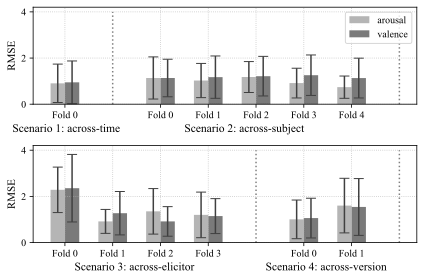

In [9]:
scenarios = np.array([1, 2, 3, 4])
folds = [[0], [0, 1, 2, 3, 4], [0, 1, 2, 3], [0, 1]]

# plt.figure(figsize=(13, 2))
plt.subplot(2, 1, 1)
for i, s in enumerate([1, 2]):
    arousal_rmses = []
    arousal_stds = []
    valence_rmses = []
    valence_stds = []
    for fold in folds[i]:
        if s == 1:
            arousal_rmses.append(rmses['folds_level'][f'scenario_{s}']['arousal']['rmse'])
            arousal_stds.append(rmses['folds_level'][f'scenario_{s}']['arousal']['std'])
            valence_rmses.append(rmses['folds_level'][f'scenario_{s}']['valence']['rmse'])
            valence_stds.append(rmses['folds_level'][f'scenario_{s}']['valence']['std'])
        else:
            arousal_rmses.append(rmses['folds_level'][f'scenario_{s}'][f'fold_{fold}']['arousal']['rmse'])
            arousal_stds.append(rmses['folds_level'][f'scenario_{s}'][f'fold_{fold}']['arousal']['std'])
            valence_rmses.append(rmses['folds_level'][f'scenario_{s}'][f'fold_{fold}']['valence']['rmse'])
            valence_stds.append(rmses['folds_level'][f'scenario_{s}'][f'fold_{fold}']['valence']['std'])
    print(f'scenario {s}')
    print('arousal rmse', arousal_rmses)
    print('arousal std', arousal_stds)
    print('valence rmse', valence_rmses)
    print('arousal std', valence_stds)
        
    plt.bar(np.array(ticks[i]) - 0.15, arousal_rmses, 
        yerr=arousal_stds, ecolor=error_color, capsize=5,
        width=0.3, color=arousal_color, label='arousal')
    plt.bar(np.array(ticks[i]) + 0.15, valence_rmses, 
            yerr=valence_stds, ecolor=error_color, capsize=5,
            width=0.3, color=valence_color, label='valence')
    plt.vlines(ticks[i][-1] + 1, 0, 4, linestyles='dotted', color='grey')
    if i == 0:
        plt.legend()

from functools import reduce

annot_y = -1.2
plt.annotate('Scenario 1: across-time', xy=(-0.1, annot_y), xycoords='data', fontsize=11.5, annotation_clip=False)
plt.annotate('Scenario 2: across-subject', xy=(3.5, annot_y), xycoords='data', fontsize=11.5, annotation_clip=False)
plt.xticks(reduce(lambda x, y: x+y, ticks[:2]), map(lambda f: f'Fold {f}', reduce(lambda x, y: x+y, folds[:2])))
plt.ylabel('RMSE')

plt.subplot(2, 1, 2)
for i, s in enumerate([1, 2, 3, 4]):
    if i == 0 or i == 1:
        continue
    arousal_rmses = []
    arousal_stds = []
    valence_rmses = []
    valence_stds = []
    for fold in folds[i]:
        if s == 1:
            arousal_rmses.append(rmses['folds_level'][f'scenario_{s}']['arousal']['rmse'])
            arousal_stds.append(rmses['folds_level'][f'scenario_{s}']['arousal']['std'])
            valence_rmses.append(rmses['folds_level'][f'scenario_{s}']['valence']['rmse'])
            valence_stds.append(rmses['folds_level'][f'scenario_{s}']['valence']['std'])
        else:
            arousal_rmses.append(rmses['folds_level'][f'scenario_{s}'][f'fold_{fold}']['arousal']['rmse'])
            arousal_stds.append(rmses['folds_level'][f'scenario_{s}'][f'fold_{fold}']['arousal']['std'])
            valence_rmses.append(rmses['folds_level'][f'scenario_{s}'][f'fold_{fold}']['valence']['rmse'])
            valence_stds.append(rmses['folds_level'][f'scenario_{s}'][f'fold_{fold}']['valence']['std'])
    print(f'scenario {s}')
    print('arousal rmse', arousal_rmses)
    print('arousal std', arousal_stds)
    print('valence rmse', valence_rmses)
    print('arousal std', valence_stds)
        
    plt.bar(np.array(ticks[i]) - 0.15, arousal_rmses, 
        yerr=arousal_stds, ecolor=error_color, capsize=5,
        width=0.3, color=arousal_color, label='arousal')
    plt.bar(np.array(ticks[i]) + 0.15, valence_rmses, 
            yerr=valence_stds, ecolor=error_color, capsize=5,
            width=0.3, color=valence_color, label='valence')
    plt.vlines(ticks[i][-1] + 1, 0, 4, linestyles='dotted', color='grey')
    if i == 0:
        plt.legend()
        
    plt.xticks(reduce(lambda x, y: x+y, ticks[2:]), map(lambda f: f'Fold {f}', reduce(lambda x, y: x+y, folds[2:])))
    plt.ylabel('RMSE')

plt.annotate('Scenario 3: across-elicitor', xy=(9.2, annot_y), xycoords='data', fontsize=11.5, annotation_clip=False)
plt.annotate('Scenario 4: across-version', xy=(13.2, annot_y), xycoords='data', fontsize=11.5, annotation_clip=False)
# plt.xticks(reduce(lambda x, y: x+y, ticks), map(lambda f: f'Fold {f}', reduce(lambda x, y: x+y, folds)))
# plt.ylabel('RMSE')
# # plt.xlabel('Fold')
plt.tight_layout()
plt.savefig('folds_level.pdf', dpi=300, format='pdf')
plt.show()

## files level

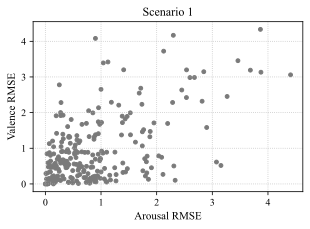

In [10]:
plt.figure(figsize=(4.845, 3.135))
rmses_arousal = [kv['arousal'] for kv in rmses['files_level']['scenario_1'].values()]
rmses_valence = [kv['valence'] for kv in rmses['files_level']['scenario_1'].values()]
plt.scatter(rmses_arousal, rmses_valence, color=valence_color, s=15)
plt.xlabel('Arousal RMSE')
plt.ylabel('Valence RMSE')
plt.title('Scenario 1')
plt.savefig('files_level_scenario_1.pdf', dpi=300, format='pdf')
plt.show()

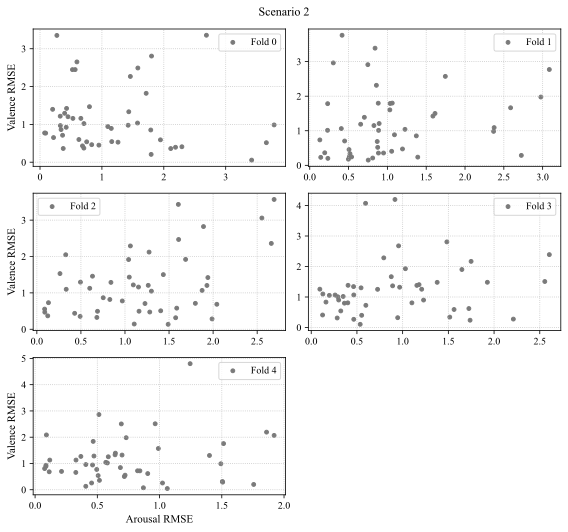

In [11]:
width_per_figure = 4
height_per_figure = 2.5
n_row = 3
n_column = 2
fig, axes = plt.subplots(n_row, n_column, figsize=(width_per_figure * n_column, height_per_figure * n_row))
axes = axes.flatten()
for fold in range(5):
    rmses_arousal = [kv['arousal'] for kv in rmses['files_level']['scenario_2'][f'fold_{fold}'].values()]
    rmses_valence = [kv['valence'] for kv in rmses['files_level']['scenario_2'][f'fold_{fold}'].values()]
    axes[fold].scatter(rmses_arousal, rmses_valence, color=valence_color, s=15, label=f'Fold {fold}')
    if fold in [4]:
        axes[fold].set_xlabel('Arousal RMSE')
    if fold in [0, 2, 4]:
        axes[fold].set_ylabel('Valence RMSE')
    axes[fold].legend()
fig.delaxes(axes[-1])
plt.suptitle('Scenario 2')
plt.tight_layout()
plt.savefig('files_level_scenario_2.pdf', dpi=300, format='pdf')
plt.show()
# plt.show()

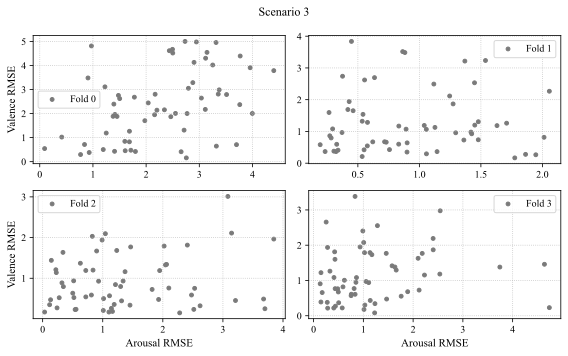

In [12]:
width_per_figure = 4
height_per_figure = 2.5
n_row = 2
n_column = 2
fig, axes = plt.subplots(n_row, n_column, figsize=(width_per_figure * n_column, height_per_figure * n_row))
axes = axes.flatten()
for fold in range(4):
    rmses_arousal = [kv['arousal'] for kv in rmses['files_level']['scenario_3'][f'fold_{fold}'].values()]
    rmses_valence = [kv['valence'] for kv in rmses['files_level']['scenario_3'][f'fold_{fold}'].values()]
    axes[fold].scatter(rmses_arousal, rmses_valence, color=valence_color, s=15, label=f'Fold {fold}')
    if fold in [2, 3]:
        axes[fold].set_xlabel('Arousal RMSE')
    if fold in [0, 2]:
        axes[fold].set_ylabel('Valence RMSE')
    axes[fold].legend()
plt.suptitle('Scenario 3')
plt.tight_layout()
plt.savefig('files_level_scenario_3.pdf', dpi=300, format='pdf')
plt.show()
# plt.show()

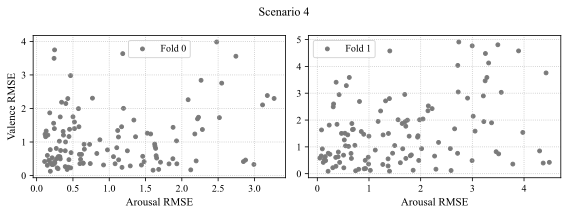

In [13]:
width_per_figure = 4
height_per_figure = 3
n_row = 1
n_column = 2
fig, axes = plt.subplots(n_row, n_column, figsize=(width_per_figure * n_column, height_per_figure * n_row))
axes = axes.flatten()
for fold in range(2):
    rmses_arousal = [kv['arousal'] for kv in rmses['files_level']['scenario_4'][f'fold_{fold}'].values()]
    rmses_valence = [kv['valence'] for kv in rmses['files_level']['scenario_4'][f'fold_{fold}'].values()]
    axes[fold].scatter(rmses_arousal, rmses_valence, color=valence_color, s=15, label=f'Fold {fold}')
    axes[fold].set_xlabel('Arousal RMSE')
    if fold in [0]:
        axes[fold].set_ylabel('Valence RMSE')
    axes[fold].legend()
plt.suptitle('Scenario 4')
plt.tight_layout()
plt.savefig('files_level_scenario_4.pdf', dpi=300, format='pdf')
plt.show()
# plt.show()

## export csv for ANOVA

In [14]:
df = pd.read_csv(f'/home/kksix/datasets/CASE_dataset/interpolated/physiological/sub_4.csv', index_col='daqtime')

In [15]:
rmses_arousal = [kv['arousal'] for kv in rmses['files_level']['scenario_1'].values()]
rmses_valence = [kv['valence'] for kv in rmses['files_level']['scenario_1'].values()]
df = pd.DataFrame({'scenario': 'across-time', 'fold': 0, 'arousal': rmses_arousal, 'valence': rmses_valence})

In [16]:
for fold in range(5):
    rmses_arousal = [kv['arousal'] for kv in rmses['files_level']['scenario_2'][f'fold_{fold}'].values()]
    rmses_valence = [kv['valence'] for kv in rmses['files_level']['scenario_2'][f'fold_{fold}'].values()]
    df = pd.concat([df, pd.DataFrame({'scenario': 'across-subject', 'fold': fold, 'arousal': rmses_arousal, 'valence': rmses_valence})])

In [17]:
for fold in range(4):
    rmses_arousal = [kv['arousal'] for kv in rmses['files_level']['scenario_3'][f'fold_{fold}'].values()]
    rmses_valence = [kv['valence'] for kv in rmses['files_level']['scenario_3'][f'fold_{fold}'].values()]
    df = pd.concat([df, pd.DataFrame({'scenario': 'across-elicitor', 'fold': fold, 'arousal': rmses_arousal, 'valence': rmses_valence})])

In [18]:
for fold in range(2):
    rmses_arousal = [kv['arousal'] for kv in rmses['files_level']['scenario_4'][f'fold_{fold}'].values()]
    rmses_valence = [kv['valence'] for kv in rmses['files_level']['scenario_4'][f'fold_{fold}'].values()]
    df = pd.concat([df, pd.DataFrame({'scenario': 'across-version', 'fold': fold, 'arousal': rmses_arousal, 'valence': rmses_valence})])

In [19]:
df.to_csv('anova.csv', index=False)